# K-Means + Visualization 
---
---

## Determine optimal K using elbow and silhouette methods.

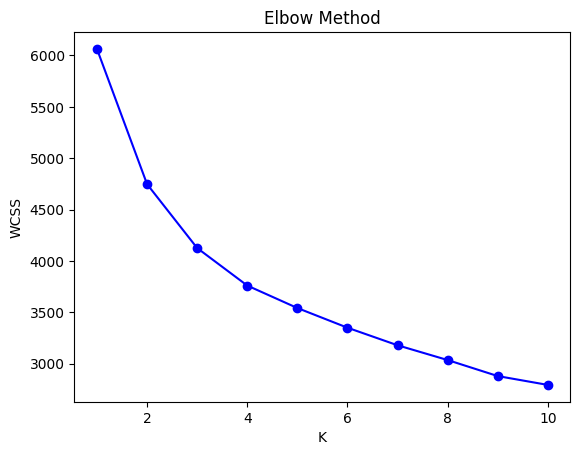

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("../data/clean_data.csv")

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

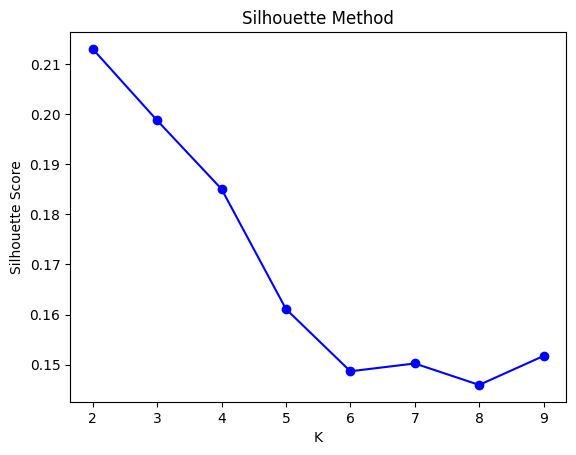

In [273]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


## Train K-Means model with chosen K.

In [274]:
import pandas as pd
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

labels = kmeans.labels_


df['Cluster'] = labels

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.628456,0.876830,-0.039615,0.684233,0.669818,0.184159,0.480665,1.430041,0
1,-0.853714,-1.210994,-0.555560,0.027134,-0.826862,-0.862642,-0.366041,-0.191010,1
2,1.221324,2.036733,-0.727541,0.070940,2.586890,-1.356134,0.618715,-0.105691,0
3,-0.853714,-1.078434,-0.555560,-0.629966,-0.595757,-0.638328,-0.930511,-1.044194,1
4,-1.150148,0.512290,-2.791321,0.684233,0.218613,1.604818,5.576238,-0.020373,0


## Visualize cluster distribution.

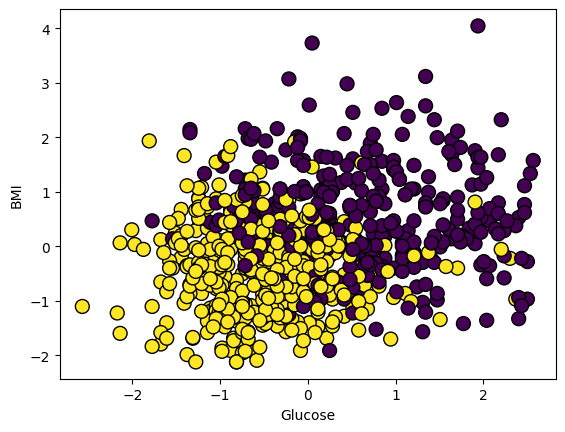

In [275]:

plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], s=100, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [276]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Silhouette Score:", silhouette_score(df, df['Cluster'] )) 
print("Davies-Bouldin:", davies_bouldin_score(df, df['Cluster'] ))  
print("Calinski-Harabasz:", calinski_harabasz_score(df, df['Cluster'] ))

Silhouette Score: 0.23659639345533914
Davies-Bouldin: 1.687610629243139
Calinski-Harabasz: 239.34654261471889


Variance explained: 51.89%


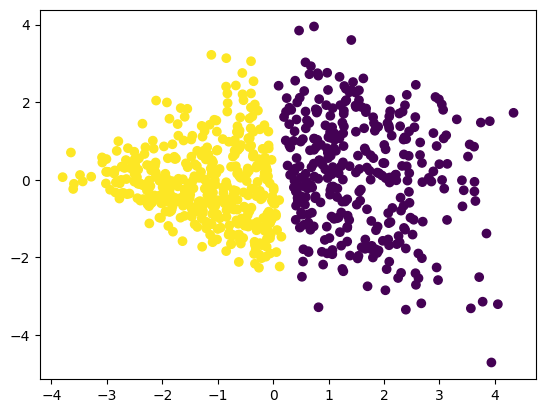

In [277]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'] , cmap='viridis')
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.2%}")

## Compute mean of features by cluster.

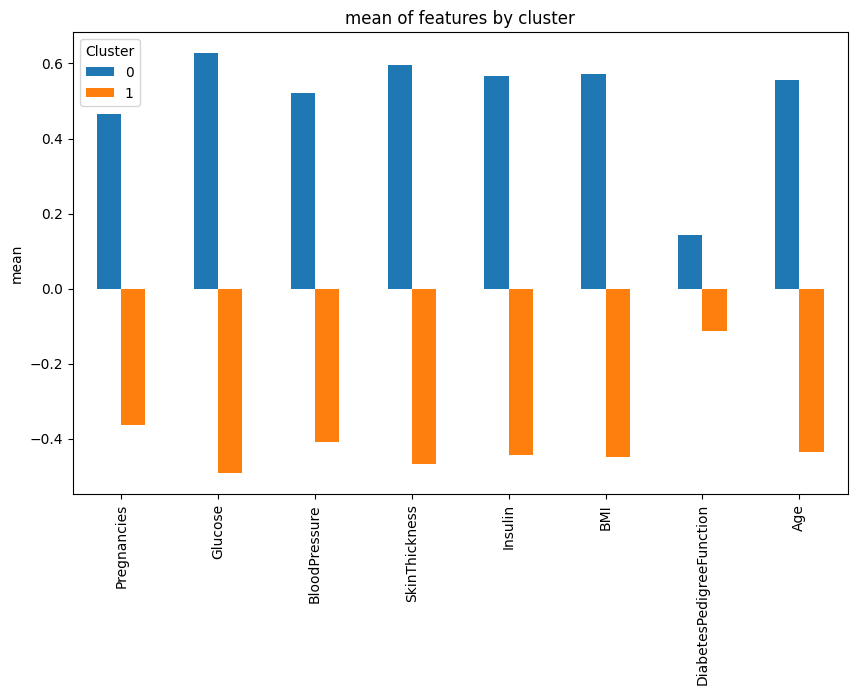

In [278]:

cluster_means = df.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(10,6))
plt.title('mean of features by cluster')
plt.ylabel('mean')
plt.show()

## Count patients in each cluster.

Cluster
1    425
0    333
Name: count, dtype: int64


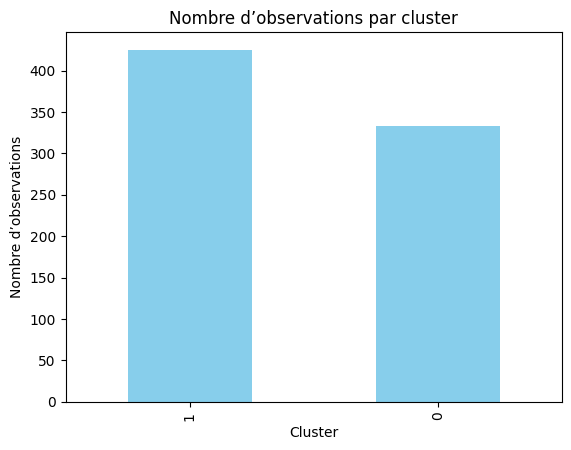

In [279]:
counts = df['Cluster'].value_counts()
print(counts)

counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d’observations par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d’observations')
plt.show()

In [280]:

# clusters = df["Cluster"]

# features = df.drop(columns=["Cluster"])
# features_real = pd.DataFrame(scaler.inverse_transform(features), columns=features.columns)
# features_real
# features_real["Cluster"] = clusters

# features_real.groupby('Cluster').mean()



| Cluster | Pregnancies | Glucose   | BloodPressure | SkinThickness | Insulin    | BMI      | DiabetesPedigreeFunction | Age      |
|---------|-------------|-----------|---------------|---------------|------------|----------|-------------------------|----------|
| 0       | 5.447447    | 140.488889| 78.535135     | 34.196396     | 199.561562 | 36.196036| 0.516952                | 39.759760|
| 1       | 2.651765    | 106.696000| 67.701176     | 24.486588     | 107.840941 | 29.369553| 0.433779                | 28.129412|

Cluster 0 shows higher-than-average values for Glucose, BMI, Insulin, and Age, suggesting a high-risk diabetic group.
Cluster 1 has lower-than-average values across these features, representing a lower-risk or healthy group.

## Add risk_category column (0 = low, 1 = high).

In [281]:
df['risk_category'] = df['Cluster'].map({
    0: 'High-risk',
    1: 'Low-risk'
})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,risk_category
0,0.628456,0.876830,-0.039615,0.684233,0.669818,0.184159,0.480665,1.430041,0,High-risk
1,-0.853714,-1.210994,-0.555560,0.027134,-0.826862,-0.862642,-0.366041,-0.191010,1,Low-risk
2,1.221324,2.036733,-0.727541,0.070940,2.586890,-1.356134,0.618715,-0.105691,0,High-risk
3,-0.853714,-1.078434,-0.555560,-0.629966,-0.595757,-0.638328,-0.930511,-1.044194,1,Low-risk
4,-1.150148,0.512290,-2.791321,0.684233,0.218613,1.604818,5.576238,-0.020373,0,High-risk
...,...,...,...,...,...,...,...,...,...,...
753,1.814192,-0.680753,0.304349,2.107949,0.350673,0.079479,-0.918240,2.539181,0,High-risk
754,-0.557280,0.015188,-0.211596,-0.191900,0.718240,0.662697,-0.399786,-0.532284,1,Low-risk
755,0.332022,-0.017952,-0.039615,-0.629966,-0.397667,-0.922460,-0.691225,-0.276328,1,Low-risk
756,-0.853714,0.147749,-1.071505,-0.892806,0.359477,-0.339242,-0.372176,1.174085,1,Low-risk


## Save the clustered data

In [282]:
file_path = '../data/clustered_data.csv' 

df.to_csv(
    file_path, 
    index=False, 
    encoding='utf-8' 
)

print(f"DataFrame successfully saved to {file_path}")

DataFrame successfully saved to ../data/clustered_data.csv
